In [1]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [2]:
def calculate_proportions(data):
    proportions = [(val / sum(data)) for val in data]
    return proportions

In [3]:
def calculate_fitness(real_proportion, synthetic_proportion):
    fitness_value = max(abs(r - s) for r, s in zip(real_proportion, synthetic_proportion))
    return fitness_value

In [4]:
persons = list(range(1, 570))
house_number = list(range(1, 278))

In [5]:
def generate_candidate_solution(num_arrays):
    #global all_settings
    all_settings = []  # List to store all arrays

    # Create specified number of arrays and store them in all_settings
    for _ in range(num_arrays):
        setting_of_person = []
        setting_of_person_with_house = {}

        # Assign persons to households randomly and store in list and dictionary
        for person in persons:
            setting = random.choice(house_number)
            setting_of_person.append(setting)
            setting_of_person_with_house[person] = setting

        # Append the current array to the list
        all_settings.append(setting_of_person)

    return all_settings

In [6]:
def setting (setting_of_person):
    counts=[]
    for i in house_number:
        count=0
        for j in setting_of_person:
            if i==j:
                count= count+1
        counts.append(count)
    #afer counting
    my_array = [0] *6  # Initialize the processed array with zeros

    # Count occurrences of each number and update the processed array
    for i in counts:
        count = counts.count(i)
        if 1 <= i <= 5:
            if count <= 1:
                my_array[i - 1] = 1
            else:
                my_array[i - 1] = count

    # Count occurrences of numbers 6 and above and update the last element of the processed array
    last_setting_and_above = sum(1 for i in counts if i >= 6)
    my_array[-1] = last_setting_and_above

    return my_array

In [7]:
df = pd.read_csv('C:/Users/Milan Kotadiya/Downloads/Household_data.csv')
# Filter the dataset for the specified area ('Mainz, St.')
df_Koblenz = df[df['area'] == 'Koblenz, St.']
# Select the columns of interest
columns_of_interest = ['Single_Person', 'Two_Person', 'Three_Person', 'Four_Person', 'Five_Person', 'Six_Person']
# Create a NumPy array from the selected columns
after_counting_realdata = df_Koblenz[columns_of_interest].values[0]

# Add 'total_house' value to the variable 'r'
r = df_Koblenz['total_Person'].values[0]

print("Values in array realdata of households according to person':", after_counting_realdata)
print("Value of 'r' (total_house):", r)

Values in array realdata of households according to person': [23892 18650  6672  4337  1316   639]
Value of 'r' (total_house): 55506


In [8]:
real_propotion = calculate_proportions(after_counting_realdata)
real_propotion

[0.4304399524375743,
 0.33599971174287463,
 0.12020322127337585,
 0.07813569704176125,
 0.02370914856051598,
 0.011512268943897957]

In [9]:
def generate_random_neighbor_solution(current_solution, value_range=(-2,2)):
    # Get the length of setting_of_person
    #length_of_setting = len(all_settings)

    # Generate random values between -2 and 2
    random_values = [random.randint(value_range[0], value_range[1]) for _ in range(len(current_solution))]

    # Ensure subtraction not more than the last member of the list
    max_subtraction = house_number[-1]

    # Calculate neighbor solution
    neighbor_solution = [min(abs(a + b), max_subtraction) for a, b in zip(current_solution, random_values)]
    
    return neighbor_solution


C:\Users\Milan Kotadiya\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Milan Kotadiya\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


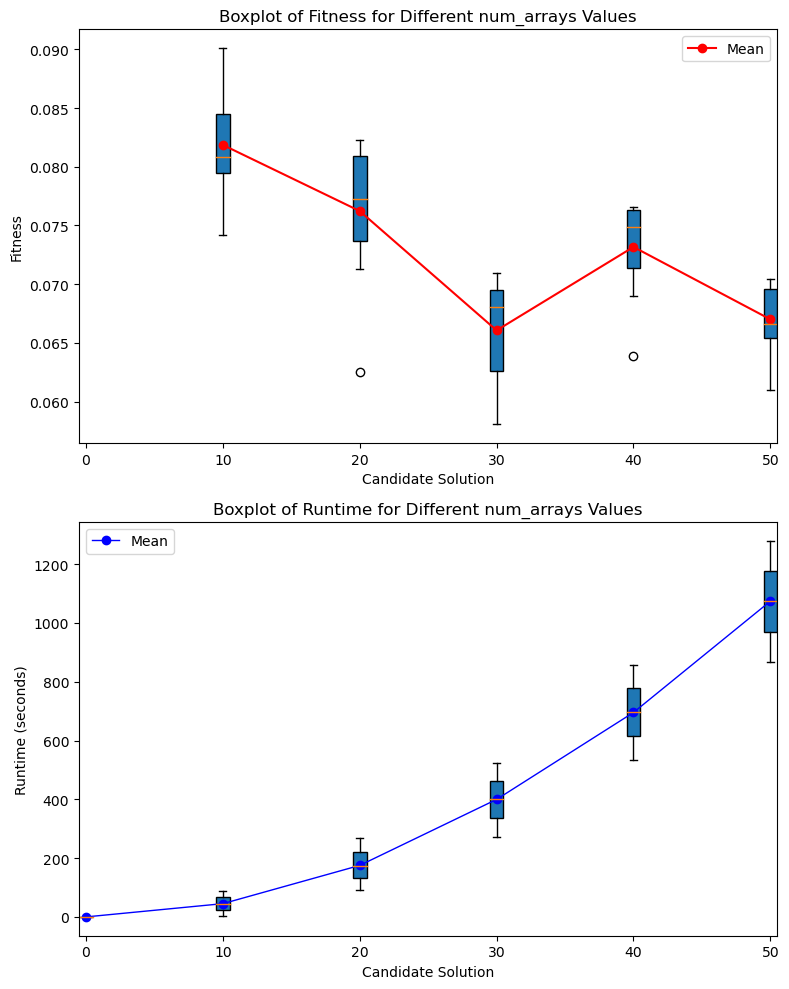

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time

def local_search(num_arrays_range, num_iterations_outer, num_iterations_inner):
    results_fitness = {}  # Dictionary to store fitness results for each num_arrays value
    results_runtime = {}  # Dictionary to store runtime results for each num_arrays value
    start_time = time.time()
    for num_arrays_value in num_arrays_range:
        candidate_solution = generate_candidate_solution(num_arrays_value)
        current_solutions = candidate_solution[:]  # Initialize with all settings
        
        last_fitness = []  # List to store fitness values corresponding to solutions in the last iteration
        runtimes = []  # List to store runtimes for each outer iteration

        for outer_iteration in range(num_iterations_outer):
              # Start time of the outer iteration
            
            all_neighbors = []  # List to store all neighbors
            all_fitness = []   # List to store fitness values of all neighbors

            for current_solution in current_solutions:
                initial_solution = current_solution

                for search_iteration in range(num_iterations_inner):
                    neighbor = generate_random_neighbor_solution(initial_solution)
                    household_count = setting(neighbor)
                    neighbor_proportion = calculate_proportions(household_count)
                    neighbor_fitness = calculate_fitness(real_propotion, neighbor_proportion)

                    # Append the neighbor and its fitness to the list of all neighbors and fitness values
                    all_neighbors.append(neighbor)
                    all_fitness.append(neighbor_fitness)

            # Combine neighbors with their fitness values
            neighbor_fitness_pairs = list(zip(all_neighbors, all_fitness))

            # Sort neighbor_fitness_pairs based on fitness values
            neighbor_fitness_pairs.sort(key=lambda x: x[1])

           
            # Select the top neighbors with minimum fitness as new current solutions
            top_neighbors = [neighbor for neighbor, _ in neighbor_fitness_pairs[:len(current_solutions)]]
            current_solutions = top_neighbors


            # Update last_fitness with fitness values of current solutions for the last iteration
            if outer_iteration == num_iterations_outer - 1:
                last_fitness.extend([fitness for neighbor, fitness in neighbor_fitness_pairs[:10]])

            end_time = time.time()  # End time of the outer iteration
            runtime = end_time - start_time  # Runtime of the outer iteration
            runtimes.append(runtime)

        # Store the last fitness values and runtimes for this num_arrays value
        results_fitness[num_arrays_value] = last_fitness
        results_runtime[num_arrays_value] = runtimes

    # Plotting fitness
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Box plot for fitness
    boxplot_data_fitness = [results_fitness[num_arrays] for num_arrays in num_arrays_range]
    boxplot_fitness = ax1.boxplot(boxplot_data_fitness, positions=num_arrays_range, patch_artist=True, widths=1)

    ax1.set_xticks(num_arrays_range)
    ax1.set_xlabel('Candidate Solution')
    ax1.set_ylabel('Fitness')
    ax1.set_title('Boxplot of Fitness for Different num_arrays Values')

    # Adding mean line for fitness
    mean_values_fitness = [np.mean(result) for result in boxplot_data_fitness]
    ax1.plot(num_arrays_range, mean_values_fitness, marker='o', color='r', linestyle='-', label='Mean')
    ax1.legend()
    
    # Box plot for runtime
    boxplot_data_runtime = [results_runtime[num_arrays] for num_arrays in num_arrays_range]
    boxplot_runtime = ax2.boxplot(boxplot_data_runtime, positions=num_arrays_range, patch_artist=True, widths=1)

    ax2.set_xticks(num_arrays_range)
    ax2.set_xlabel('Candidate Solution')
    ax2.set_ylabel('Runtime (seconds)')
    ax2.set_title('Boxplot of Runtime for Different num_arrays Values')

    # Adding mean line for runtime
    mean_values_runtime = [np.mean(result) for result in boxplot_data_runtime]
    ax2.plot(num_arrays_range, mean_values_runtime, marker='o', color='b', linestyle='-', label='Mean',linewidth=1)
    ax2.legend()

    plt.tight_layout()
    plt.show()
    


    return results_fitness, results_runtime

# Define the range of values for num_arrays
num_arrays_range = list(range(0,60,10))
num_iterations_outer = 40
num_iterations_inner = 20

# Call the function and get results for fitness and runtime
results_fitness, results_runtime = local_search(num_arrays_range, num_iterations_outer, num_iterations_inner)
